<a href="https://colab.research.google.com/github/Avisek183/Pneumonia-Detection-using-CNN/blob/main/FinalModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
print(tf.__version__)

2.3.0


In [ ]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,AveragePooling2D, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization,SpatialDropout2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import precision_recall_curve,roc_auc_score,auc, roc_curve, accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('fivethirtyeight')
import pickle 
import os 
import numpy as np
import cv2 
%matplotlib inline
import pandas.util.testing as tm

In [ ]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 200
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)


In [ ]:
!unzip "/content/drive/My Drive/chest_xray.zip"

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0448-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0449-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0450-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0451-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0452-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0453-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0453-0001.jpeg  
  inflating: chest_xray/tra

In [ ]:
train = get_training_data('chest_xray/train')
test = get_training_data('chest_xray/test')


OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



In [ ]:
pnenumonia = 0 
normal = 0 

for i, j in train:
    if j == 0:
        pnenumonia+=1
    else:
        normal+=1
        
print('Pneumonia:', pnenumonia)
print('Normal:', normal)
print('Pneumonia - Normal:', pnenumonia-normal)

Pneumonia: 3888
Normal: 1349
Pneumonia - Normal: 2539


PNEUMONIA


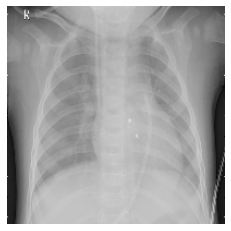

In [ ]:
plt.imshow(train[1][0], cmap='gray')
plt.axis('off')
print(labels[train[1][1]])

In [ ]:
X = []
y = []

for feature, label in train:
    X.append(feature)
    y.append(label)

for feature, label in test:
    X.append(feature)
    y.append(label)
'''    
for feature, label in val:
   X.append(feature)
   y.append(label)
'''

# resize data for deep learning 
X = np.array(X).reshape(-1, img_size, img_size, 1)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=32)

In [ ]:
X_train = X_train / 255
X_test = X_test / 255
X_val = X_val / 255


In [ ]:
# good for balancing out disproportions in the dataset 
datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=90, 
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=True,  
        vertical_flip=True)  

datagen.fit(X_train)


In [ ]:
print(X_train[0])

[[[0.14117647]
  [0.16078431]
  [0.17647059]
  ...
  [0.73333333]
  [0.75686275]
  [0.77647059]]

 [[0.14901961]
  [0.15294118]
  [0.18431373]
  ...
  [0.7254902 ]
  [0.74509804]
  [0.76078431]]

 [[0.15294118]
  [0.17254902]
  [0.18431373]
  ...
  [0.7372549 ]
  [0.73333333]
  [0.75686275]]

 ...

 [[0.        ]
  [0.        ]
  [0.        ]
  ...
  [0.68627451]
  [0.70196078]
  [0.71372549]]

 [[0.01568627]
  [0.        ]
  [0.        ]
  ...
  [0.68235294]
  [0.69411765]
  [0.71764706]]

 [[0.        ]
  [0.        ]
  [0.        ]
  ...
  [0.68627451]
  [0.69803922]
  [0.72156863]]]


In [ ]:
model = Sequential()
#layer1
model.add(Conv2D(256, (3, 3), input_shape=X_train.shape[1:], padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization(axis=1))
#layer2
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization(axis=1))
#layer3
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization(axis=1))
#layer4
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization(axis=1))
#layer5
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization(axis=1))
#layer6
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization(axis=1))
#layer7
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization(axis=1))
#layer8
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization(axis=1))
#layer9
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization(axis=1))
#layer10
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization(axis=1))
model.add(Flatten()) 
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
early_stop = EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True)
adam = Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['acc'])

#checkpoint = ModelCheckpoint(filepath='best_weights.hdf5', save_best_only=True, save_weights_only=True)
#lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, verbose=2, mode='max')
#early_stop = EarlyStopping(monitor='val_loss', min_delta=0.1, patience=1, mode='min')


In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_90 (Conv2D)           (None, 200, 200, 256)     2560      
_________________________________________________________________
activation_112 (Activation)  (None, 200, 200, 256)     0         
_________________________________________________________________
max_pooling2d_81 (MaxPooling (None, 100, 100, 256)     0         
_________________________________________________________________
batch_normalization_90 (Batc (None, 100, 100, 256)     400       
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 100, 100, 256)     590080    
_________________________________________________________________
activation_113 (Activation)  (None, 100, 100, 256)     0         
_________________________________________________________________
max_pooling2d_82 (MaxPooling (None, 50, 50, 256)      

In [ ]:

history = model.fit(datagen.flow(X_train, y_train, batch_size=10), callbacks=[early_stop], validation_data=(X_val, y_val), epochs=15)

#history = model.fit(datagen.flow(X_train, y_train, batch_size=32), callbacks=[checkpoint, early_stop], validation_data=(X_val, y_val), epochs=10)

#model.fit_generator(
           #train_gen, steps_per_epoch=train_gen.samples // batch_size, 
          # epochs=epochs, validation_data=test_gen, 
           #validation_steps=test_gen.samples // batch_size, callbacks=[checkpoint, lr_reduce])

           

Epoch 1/15
375/375 [==============================] - 24s 63ms/step - loss: 0.4668 - acc: 0.7619 - val_loss: 1.1328 - val_acc: 0.7324
Epoch 2/15
375/375 [==============================] - 23s 62ms/step - loss: 0.3784 - acc: 0.8301 - val_loss: 0.5511 - val_acc: 0.7473
Epoch 3/15
375/375 [==============================] - 23s 62ms/step - loss: 0.3540 - acc: 0.8461 - val_loss: 0.3029 - val_acc: 0.8561
Epoch 4/15
375/375 [==============================] - 23s 63ms/step - loss: 0.3268 - acc: 0.8677 - val_loss: 0.3972 - val_acc: 0.7878
Epoch 5/15
375/375 [==============================] - 23s 62ms/step - loss: 0.3187 - acc: 0.8712 - val_loss: 0.2315 - val_acc: 0.9030
Epoch 6/15
375/375 [==============================] - 23s 62ms/step - loss: 0.2996 - acc: 0.8848 - val_loss: 0.2192 - val_acc: 0.9190
Epoch 7/15
375/375 [==============================] - 23s 62ms/step - loss: 0.2929 - acc: 0.8864 - val_loss: 0.2818 - val_acc: 0.8657
Epoch 8/15
375/375 [==============================] - 23s 62ms

In [ ]:
history.history

{'acc': [0.7618666887283325,
  0.830133318901062,
  0.8461333513259888,
  0.867733359336853,
  0.8712000250816345,
  0.8848000168800354,
  0.8863999843597412,
  0.8912000060081482,
  0.899733304977417,
  0.8967999815940857,
  0.9056000113487244,
  0.9125333428382874,
  0.9130666851997375,
  0.9175999760627747,
  0.9170666933059692],
 'loss': [0.466792494058609,
  0.37835225462913513,
  0.35402125120162964,
  0.32682326436042786,
  0.31867656111717224,
  0.29963645339012146,
  0.2929210662841797,
  0.27397310733795166,
  0.2589685320854187,
  0.263908714056015,
  0.2488328218460083,
  0.23574809730052948,
  0.23459812998771667,
  0.23586209118366241,
  0.22486157715320587],
 'val_acc': [0.7324093580245972,
  0.7473347783088684,
  0.8560767769813538,
  0.7878465056419373,
  0.9029850959777832,
  0.9189765453338623,
  0.8656716346740723,
  0.7921108603477478,
  0.9243070483207703,
  0.9072494506835938,
  0.9275053143501282,
  0.9371002316474915,
  0.8944562673568726,
  0.916844367980957,


In [ ]:
history.history['acc']

[0.7618666887283325,
 0.830133318901062,
 0.8461333513259888,
 0.867733359336853,
 0.8712000250816345,
 0.8848000168800354,
 0.8863999843597412,
 0.8912000060081482,
 0.899733304977417,
 0.8967999815940857,
 0.9056000113487244,
 0.9125333428382874,
 0.9130666851997375,
 0.9175999760627747,
 0.9170666933059692]

In [ ]:
np.mean(history.history['val_acc'])

0.8684435009956359

In [ ]:
model.evaluate(X_test, y_test,verbose=1,batch_size=16)

74/74 [==============================] - 2s 31ms/step - loss: 0.2019 - acc: 0.9309


[0.20193374156951904, 0.9309462904930115]

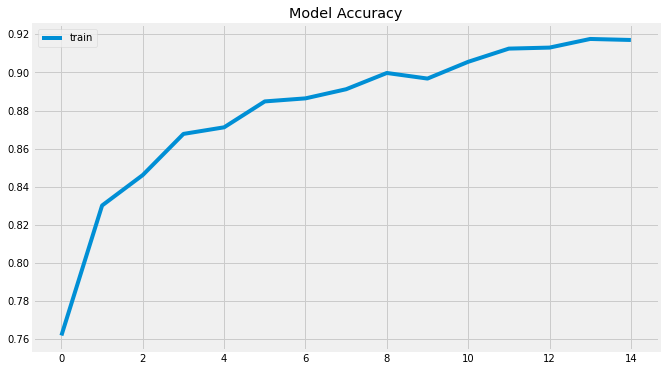

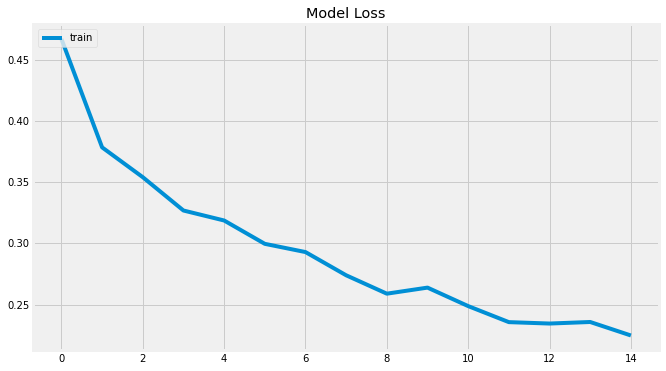

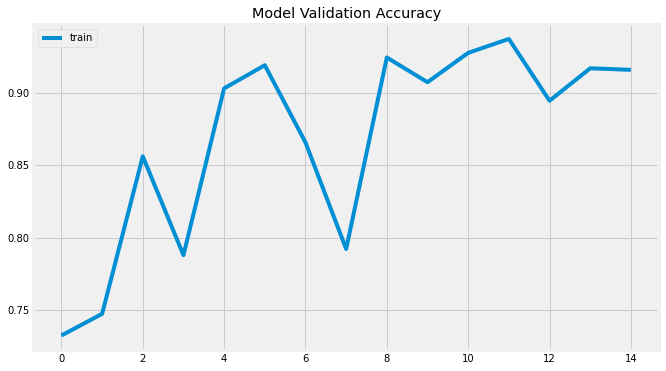

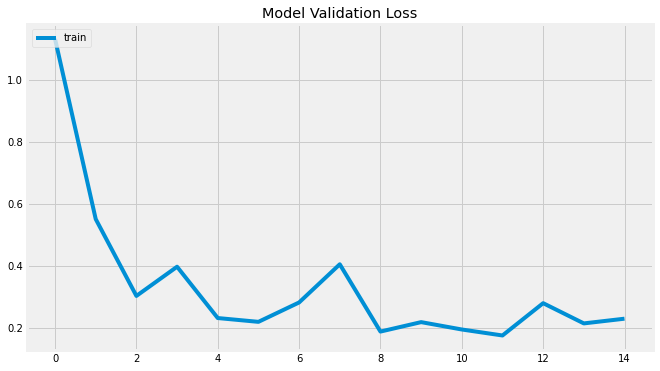

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.epoch, history.history['acc'])
plt.title('Model Accuracy')
plt.legend(['train'], loc='upper left')
plt.show()
 
plt.figure(figsize=(10, 6))
plt.plot(history.epoch, history.history['loss'])
plt.title('Model Loss')
plt.legend(['train'], loc='upper left')
plt.show()
 
plt.figure(figsize=(10, 6))
plt.plot(history.epoch, history.history['val_acc'])
plt.title('Model Validation Accuracy')
plt.legend(['train'], loc='upper left')
plt.show()
 
plt.figure(figsize=(10, 6))
plt.plot(history.epoch, history.history['val_loss'])
plt.title('Model Validation Loss')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
pred = model.predict(X_train)
precisions, recalls, thresholds = precision_recall_curve(y_train, pred)
fpr, tpr, thresholds2 = roc_curve(y_train, pred)

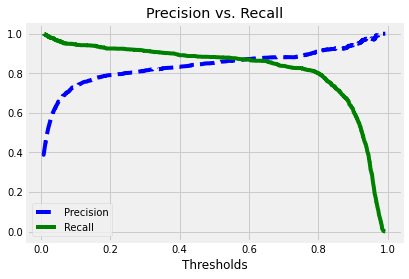

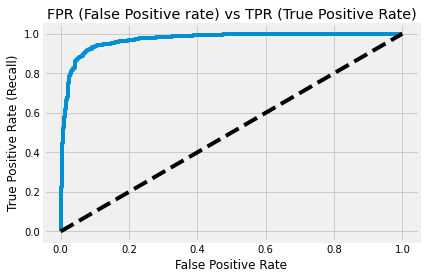

In [ ]:
def plot_precision_recall(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--')
    plt.plot(thresholds, recalls[:-1], 'g-')
    plt.title('Precision vs. Recall')
    plt.xlabel('Thresholds')
    plt.legend(['Precision', 'Recall'], loc='best')
    plt.show()
 
def plot_roc(fpr, tpr):
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('FPR (False Positive rate) vs TPR (True Positive Rate)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.show()
    
plot_precision_recall(precisions, recalls, thresholds)
 
plot_roc(fpr, tpr)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
binary_predictions = []
threshold = thresholds[np.argmax(precisions >= 0.80)]
for i in predictions:
    if i >= threshold:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0)

In [ ]:
accuracy=accuracy_score(binary_predictions, y_test)
precision=precision_score(binary_predictions, y_test)
recall=recall_score(binary_predictions, y_test)
f1_score=f1_score=2*((precision*recall)/(precision+recall))
print('Accuracy on testing set:', accuracy)
print('Precision on testing set:', precision)
print('Recall on testing set:', recall)
print('f1_score on testing data:',f1_score)

Accuracy on testing set: 0.9249786871270247
Precision on testing set: 0.899390243902439
Recall on testing set: 0.8428571428571429
f1_score on testing data: 0.8702064896755162


[Text(0, 0.5, 'PNEUMONIA'), Text(0, 1.5, 'NORMAL')]

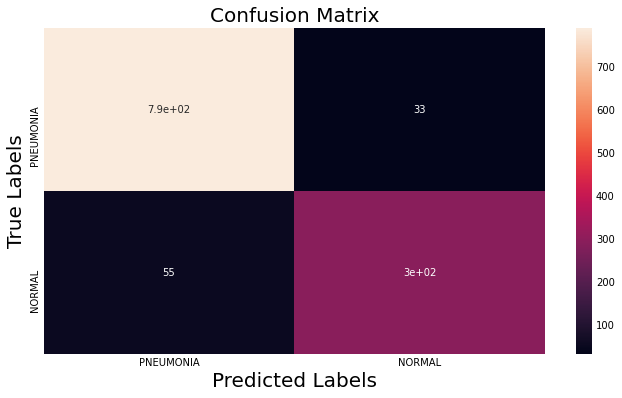

In [ ]:
matrix = confusion_matrix(binary_predictions, y_test)
plt.figure(figsize=(10, 6),facecolor='white')
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

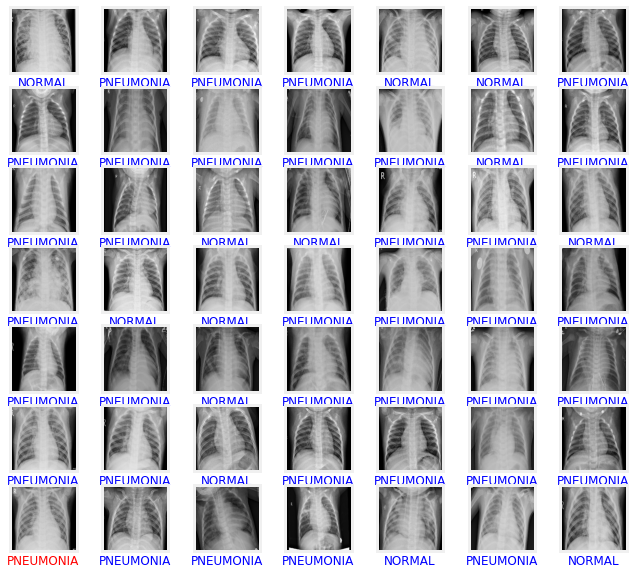

In [ ]:
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train.reshape(-1, img_size, img_size)[i], cmap='gray')
    if(binary_predictions[i]==y_test[i]):
        plt.xlabel(labels[binary_predictions[i]], color='blue')
    else:
        plt.xlabel(labels[binary_predictions[i]], color='red')
plt.show()